## Synthetic Data Analysis

#### Comparing speed and accuracy of Python's Hottbox CMTF and MATLAB's CMTF Toolbox on Synthetic Data

#### Loading 4 measurements from MATLAB

In [2]:
import numpy as np
import tensorly as tl
import functools
import warnings
import scipy.io as sio

# Importing MATLAB data
ranks = sio.loadmat('MAT_ranks5.mat')['rankArr']
Mat_wallTime = sio.loadmat('MAT_wallTime5.mat')['wallTime'] 
Mat_cpuTime = sio.loadmat('MAT_cpuTime5.mat')['cpuTime'] 
Mat_Trecon = sio.loadmat('MAT_Trecon5.mat')['Trecon']
Mat_Mrecon = sio.loadmat('MAT_Mrecon5.mat')['Mrecon']

In [3]:
# Importing Python data
Py_wallTime = np.load('Py_wallTime.npy')
Py_cpuTime = np.load('Py_cpuTime.npy')
Py_Trecon = np.load('Py_Trecon.npy')
Py_Mrecon = np.load('Py_Mrecon.npy')

#### Plots

**Rank vs Tensor reconstruction error, Matrix reconstruction error, Wall time, CPU time**

For both Python and MATLAB: 
- Rank = 3:10
- Max iterations = 100
- Tolerance = 10e-8
- Dense tensors used
- $I \times I \times I$ tensor and $I \times I$ matrix
- Procedure: 
    - 5 runs for each rank on MATLAB and Python (each run used same tensor/matrix for MATLAB and Python)
    - Plotting the averages of those 5 runs for each measurement
    
Details: 
- Tensor/Matrix reconstruction error computed with Frobenius norm of difference b/w original and final tensor/matrix
- Wall time, CPU time computed only for CMTF function itself
    - Wall time is considered a more accurate measure

In [4]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

size = np.array([10, 25, 50, 75])
R = 14

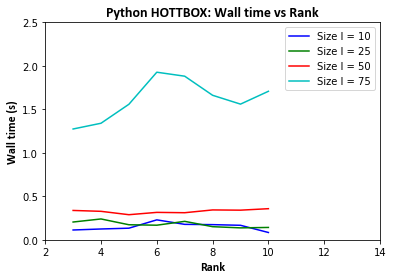

In [5]:
# Plot 1: Python: Wall time vs Rank
plt.figure()
plt.plot(ranks[0], Py_wallTime[0,:,5],'b-', ranks[0], Py_wallTime[1,:,5],'g-', 
         ranks[0], Py_wallTime[2,:,5],'r-', ranks[0], Py_wallTime[3,:,5],'c-')
plt.title('Python HOTTBOX: Wall time vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Wall time (s)', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,2.5)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Python_wallTime_rank.png', dpi=1200)

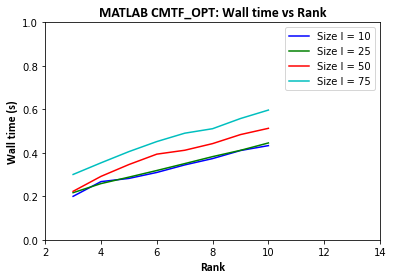

In [6]:
# Plot 2: MATLAB: Wall time vs Rank
plt.figure()
plt.plot(ranks[0], Mat_wallTime[0][0][:,5],'b-', ranks[0], Mat_wallTime[0][1][:,5],'g-', 
         ranks[0], Mat_wallTime[0][2][:,5],'r-', ranks[0], Mat_wallTime[0][3][:,5],'c-')
plt.title('MATLAB CMTF_OPT: Wall time vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Wall time (s)', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,1)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Matlab_wallTime_rank.png', dpi=1200)

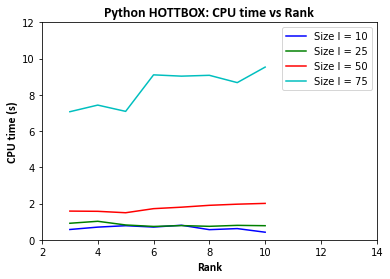

In [7]:
# Plot 3: Python: CPU time vs Rank
plt.figure()
plt.plot(ranks[0], Py_cpuTime[0,:,5],'b-', ranks[0], Py_cpuTime[1,:,5],'g-', 
         ranks[0], Py_cpuTime[2,:,5],'r-', ranks[0], Py_cpuTime[3,:,5],'c-')
plt.title('Python HOTTBOX: CPU time vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('CPU time (s)', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,12)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Python_cpuTime_rank.png', dpi=1200)

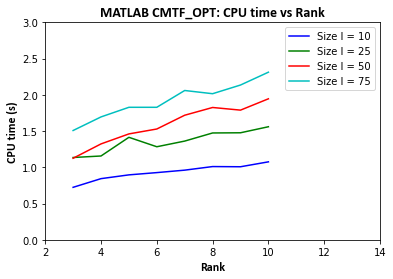

In [8]:
# Plot 4: MATLAB: CPU time vs Rank
plt.figure()
plt.plot(ranks[0], Mat_cpuTime[0][0][:,5],'b-', ranks[0], Mat_cpuTime[0][1][:,5],'g-', 
         ranks[0], Mat_cpuTime[0][2][:,5],'r-', ranks[0], Mat_cpuTime[0][3][:,5],'c-')
plt.title('MATLAB CMTF_OPT: CPU time vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('CPU time (s)', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,3)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Matlab_cpuTime_rank.png', dpi=1200)

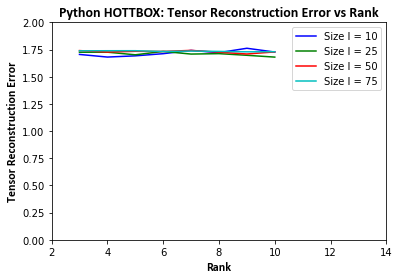

In [9]:
# Plot 5: Python: Tensor Reconstruction Error vs Rank
plt.figure()
plt.plot(ranks[0], Py_Trecon[0,:,5],'b-', ranks[0], Py_Trecon[1,:,5],'g-', 
         ranks[0], Py_Trecon[2,:,5],'r-', ranks[0], Py_Trecon[3,:,5],'c-')
plt.title('Python HOTTBOX: Tensor Reconstruction Error vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Tensor Reconstruction Error', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,2)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Python_Trecon_rank.png', dpi=1200)

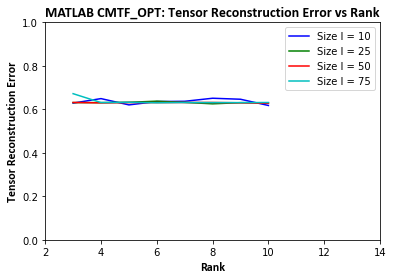

In [10]:
# Plot 6: MATLAB: Tensor Reconstruction Error vs Rank
plt.figure()
plt.plot(ranks[0], Mat_Trecon[0][0][:,5],'b-', ranks[0], Mat_Trecon[0][1][:,5],'g-', 
         ranks[0], Mat_Trecon[0][2][:,5],'r-', ranks[0], Mat_Trecon[0][3][:,5],'c-')
plt.title('MATLAB CMTF_OPT: Tensor Reconstruction Error vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Tensor Reconstruction Error', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,1)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Matlab_Trecon_rank.png', dpi=1200)

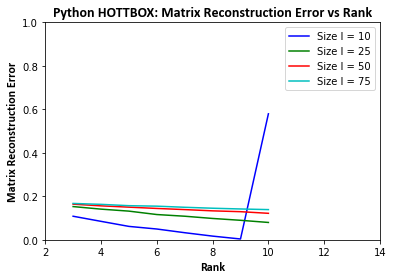

In [11]:
# Plot 7: Python: Matrix Reconstruction Error vs Rank
plt.figure()
plt.plot(ranks[0], Py_Mrecon[0,:,5],'b-', ranks[0], Py_Mrecon[1,:,5],'g-', 
         ranks[0], Py_Mrecon[2,:,5],'r-', ranks[0], Py_Mrecon[3,:,5],'c-')
plt.title('Python HOTTBOX: Matrix Reconstruction Error vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Matrix Reconstruction Error', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,1)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Python_Mrecon_rank.png', dpi=1200)

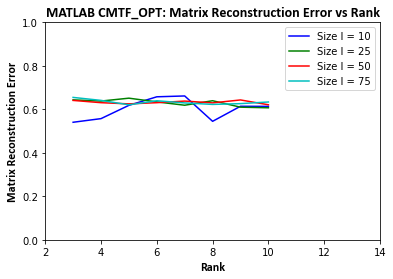

In [12]:
# Plot 8: MATLAB: Matrix Reconstruction Error vs Rank
plt.figure()
plt.plot(ranks[0], Mat_Mrecon[0][0][:,5],'b-', ranks[0], Mat_Mrecon[0][1][:,5],'g-', 
         ranks[0], Mat_Mrecon[0][2][:,5],'r-', ranks[0], Mat_Mrecon[0][3][:,5],'c-')
plt.title('MATLAB CMTF_OPT: Matrix Reconstruction Error vs Rank', fontname="Calibri", size=14,fontweight="bold")
plt.xlabel('Rank', fontname="Calibri", size=12,fontweight="bold")
plt.ylabel('Matrix Reconstruction Error', fontname="Calibri", size=12,fontweight="bold")
plt.xlim(2,R)
plt.ylim(0,1)
plt.legend( ['Size I = 10', 'Size I = 25', 'Size I = 50', 
             'Size I = 75', 'Size I = 100'] )
#plt.savefig('Matlab_Mrecon_rank.png', dpi=1200)